# 3 Pixel processing
This is the third part of a series on how to read raster images from files,
manipulate them, display the result in a notebook and save it to a file.
I assume you have read the [first part](1-introduction.ipynb).

This part contains exercises that manipulate each pixel of an image
independently of others.
Most exercises are adapted from Joshua T. Guerin and Debby Keen's
[PPM Image Editor](http://nifty.stanford.edu/2012/guerin-image-editor/)
assignment. Their cake image is used with permission.

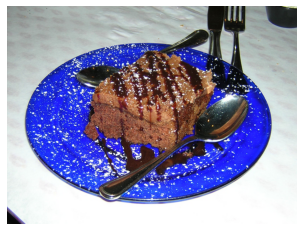

In [1]:
from raster import *

show(load('cake.jpg'))

In the following, I removed the solution code but kept the resulting images,
so that you can see what your code should generate.
If you're editing this notebook, only run one code cell at a time,
or you will lose all generated images.

## 3.1 Convert to greyscale
To transform a colour image into a greyscale image,
set the channels of each pixel to the same value,
namely the average (mean) of the original three values.
For example, pixel [3, 6, 8] becomes [5, 5, 5] or [6, 6, 6]
depending on whether you round the average down or up.

In [2]:
def greyscale(image: Raster) -> None:
    """Transform the input image into a greyscale image."""
    for row in image:
        for pixel in row:
            pass

When applied to the cake image, you should get:

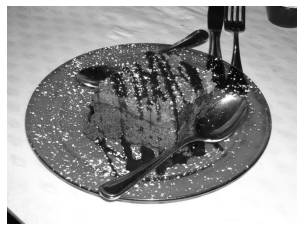

In [3]:
image = load('cake.jpg')
greyscale(image)
show(image)

An image that is already greyscale shouldn't change.

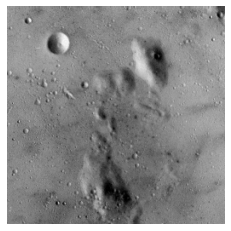

In [4]:
image = load('moon.tiff')
greyscale(image)
show(image)

## 3.2 Invert channel
Inverting a channel consists in subtracting its value from 255.
For example, pixel [3, 6, 8] becomes [252, 6, 8] if inverting the red channel
and [3, 6, 247] if inverting the blue channel.

In [5]:
def invert(image: Raster, channel: int) -> None:
    """Invert the given channel of the image.

    channel is the constant R, G or B
    """
    for row in image:
        for pixel in row:
            pass

When inverting the red channel, [255, 255, 255] (white) becomes
[0, 255, 255] (green-blue) and [0, 0, 0] (black) becomes
[255, 0, 0] (red). Applied to the cake image, we get:

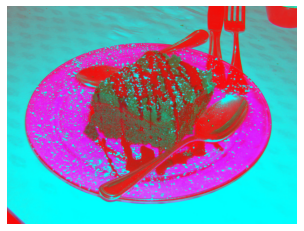

In [6]:
image = load('cake.jpg')
invert(image, R)
show(image)

For a greyscale image, if we invert all channels,
we get the negative image:
black becomes white, dark grey becomes light grey, and vice versa.

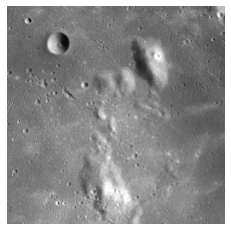

In [7]:
image = load('moon.tiff')
invert(image, R)
invert(image, G)
invert(image, B)
show(image)

**Activity:**
Invert only one channel of the moon image and explain the result.
(Hint: think what happens to white and to black pixels.)

## 3.3 Flatten channel
Flattening a channel consists in setting it to 0.
For example, pixel [3, 6, 8] becomes [0, 6, 8] if flattening the red channel
and [3, 6, 0] if flattening the blue channel.

In [8]:
def flatten(image: Raster, channel: int) -> None:
    """Set the the given channel of the image to zero.

    channel is the constant R, G or B
    """
    for row in image:
        for pixel in row:
            pass

If we flatten the red channel, the cake image becomes blueish green.

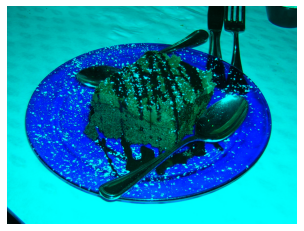

In [9]:
image = load('cake.jpg')
flatten(image, R)
show(image)

If we flatten the green channel of a greyscale image, it becomes violet,
because only the red and blue light remains.

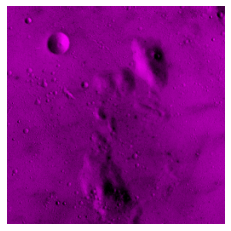

In [10]:
image = load('moon.tiff')
flatten(image, G)
show(image)

**Activity:** For either image, first flatten only the blue channel,
then flatten two channels at the same time, and finally
flatten all three channels.
Predict how the image will look like before you run the code.

## 3.4 Extreme contrast
For this exercise, round each channel value up to 255 or down to 0,
depending on what is the closest value.
For example, pixel [127, 128, 5] becomes [0, 255, 0].

In [11]:
def contrast(image: Raster) -> None:
    """Make the image high contrast."""
    for row in image:
        for pixel in row:
            pass

When applied to the cake image, you should get:

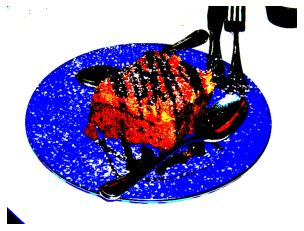

In [12]:
image = load('cake.jpg')
contrast(image)
show(image)

A greyscale image becomes pure black and white because
dark grey is 'rounded down' to black and light grey is 'rounded up' to white.

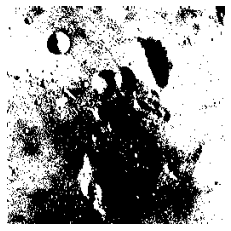

In [13]:
image = load('moon.tiff')
contrast(image)
show(image)

## 3.5 Swap channels
You can change an image in a striking way by swapping two channels.
For example, pixel [3, 4, 5] becomes [5, 4, 3] if the red and blue channels
are swapped and [3, 5, 4] if the green and blue channels are swapped.

In [14]:
def swap(image: Raster, channel1: int, channel2: int) -> None:
    """Swap the given channels in each pixel.

    channel1 and channel2 are constant R, G or B
    """
    for row in image:
        for pixel in row:
            pass

If we swap the green and red channels in the cake image,
the light red dots on the table cloth become light green.
Brown light has a high contribution of red light but
low contributions of blue and green light.
Swapping the red and green values makes the chocolate cake and sauce green too.

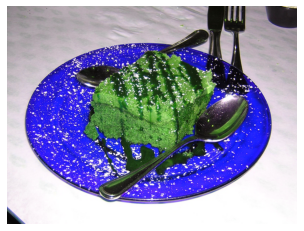

In [15]:
image = load('cake.jpg')
swap(image, R, G)
show(image)

**Activity:**
Does it make sense to swap channels of greyscale images?
(Hint: see what happened to white and black surfaces in the cake image.)

## 3.6 Noise
In images, noise is a random variation of the brightness or of the colours.
One way to simulate noise is to randomly increase or decrease,
up to a certain amount, each channel value of each pixel.
For example, if the maximum variation is 3, pixel [1, 252, 4]
could become [0, 255, 1] or [4, 250, 4] among other possibilities.
No channel value can become negative or exceed 255.

The next function has a parameter for the maximum variation.
Use `randint(-delta, delta)` to generate a random number in that interval.

In [16]:
from random import randint

def noise(image: Raster, delta: int) -> None:
    """Add a random number from -delta to delta to each channel of each pixel.

    delta is positive
    """
    for row in image:
        for pixel in row:
            pass

Here's the cake image with some noise. It's displayed at a larger size,
to better see how 'grainy' the table cloth has become.
You need to use your browser's zoom in functionality to see the grain in
the darker parts of the image, like the spoon and the sauce.

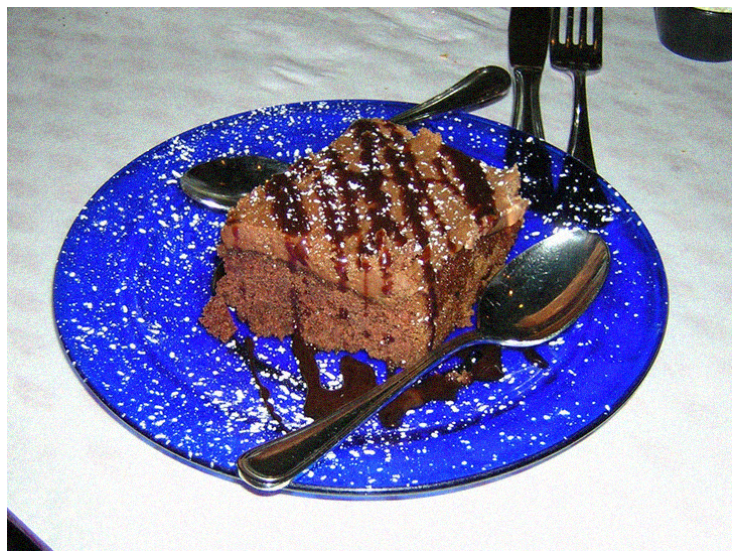

In [17]:
image = load('cake.jpg')
noise(image, 20)
show(image, 2.5)

The [next part](4-image.ipynb) of this series has exercises that
require modifying groups of pixels together.